In [1]:
import numpy as np
import tensorflow as tf

from data import create_data_gaussian, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_raw, plot_n_ratio, plot_w, plot_w2, plot_training

In [ ]:
output_dir = "results/gauss_5dim/"
bins = np.arange(-3, 3.1, 0.1)

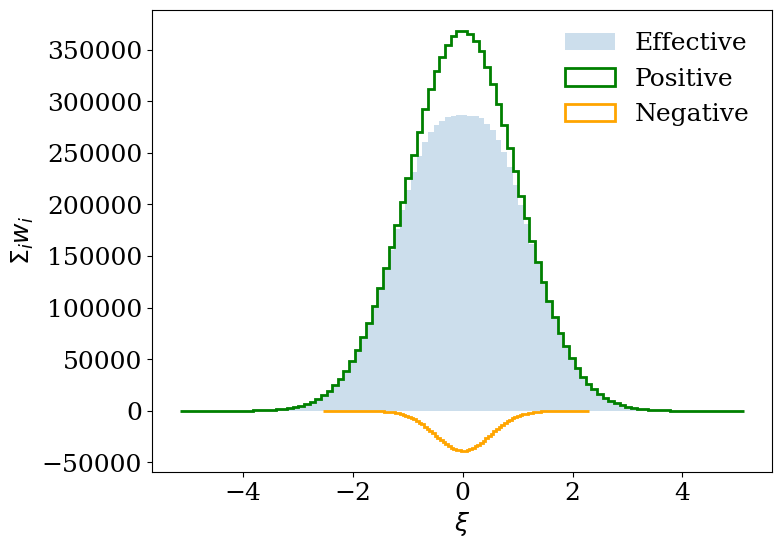

In [2]:
data = pos, neg, pos_weights, neg_weights = create_data_gaussian(10_000_000, neg_frac=0.10, neg_scale=0.5, shape=(5,))
plot_raw(data=data, bins=bins, path=output_dir + "raw.pdf")

Epoch 1/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 41s 802us/step - accuracy: 0.4999 - loss: -63.2460 - val_accuracy: 0.5000 - val_loss: -1041.5532
Epoch 2/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 39s 780us/step - accuracy: 0.5002 - loss: -2191.8088 - val_accuracy: 0.5001 - val_loss: -8333.0762
Epoch 3/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 40s 791us/step - accuracy: 0.4999 - loss: -12070.5635 - val_accuracy: 0.5001 - val_loss: -28199.1035
Epoch 4/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 41s 824us/step - accuracy: 0.5000 - loss: -35801.7539 - val_accuracy: 0.5001 - val_loss: -66783.0234
Epoch 5/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 42s 832us/step - accuracy: 0.5000 - loss: -79226.2031 - val_accuracy: 0.5001 - val_loss: -130642.5000


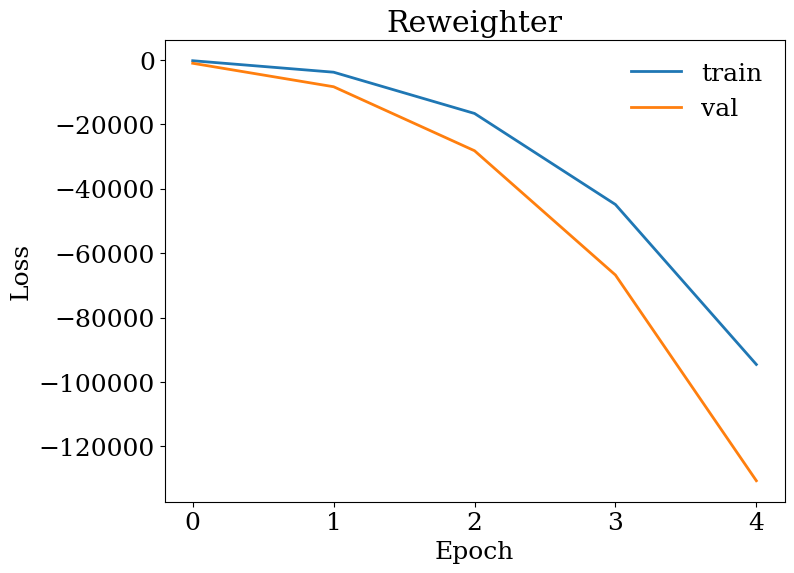

In [3]:
reweighter = simple_model((5,))
reweighter.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter", path=output_dir + "training_reweighter.pdf")

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 819us/step - accuracy: 0.9113 - loss: 0.1963 - val_accuracy: 0.9126 - val_loss: 0.1926
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 821us/step - accuracy: 0.9121 - loss: 0.1937 - val_accuracy: 0.9126 - val_loss: 0.1931
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 823us/step - accuracy: 0.9124 - loss: 0.1932 - val_accuracy: 0.9126 - val_loss: 0.1933
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 834us/step - accuracy: 0.9123 - loss: 0.1934 - val_accuracy: 0.9127 - val_loss: 0.1930
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 21s 825us/step - accuracy: 0.9124 - loss: 0.1932 - val_accuracy: 0.9127 - val_loss: 0.1927


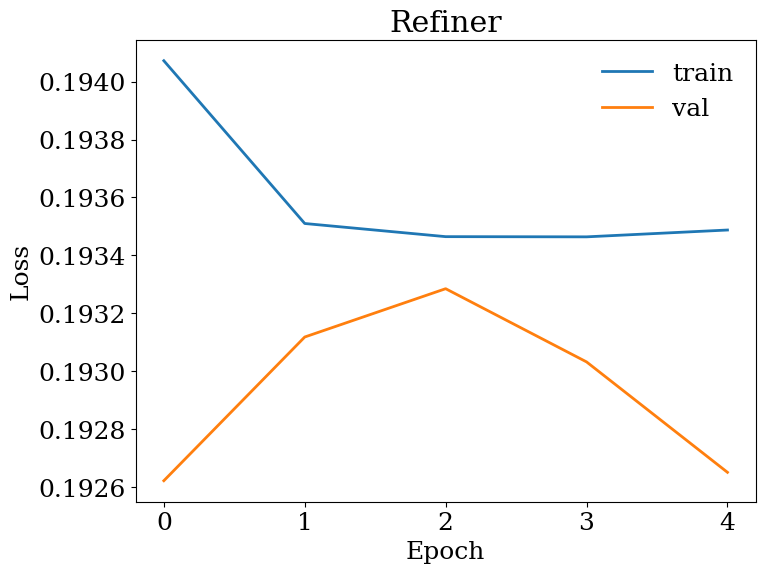

In [4]:
refiner = simple_model((5,))
refiner.compile(optimizer="rmsprop", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner", path=output_dir + "training_refiner.pdf")

In [5]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


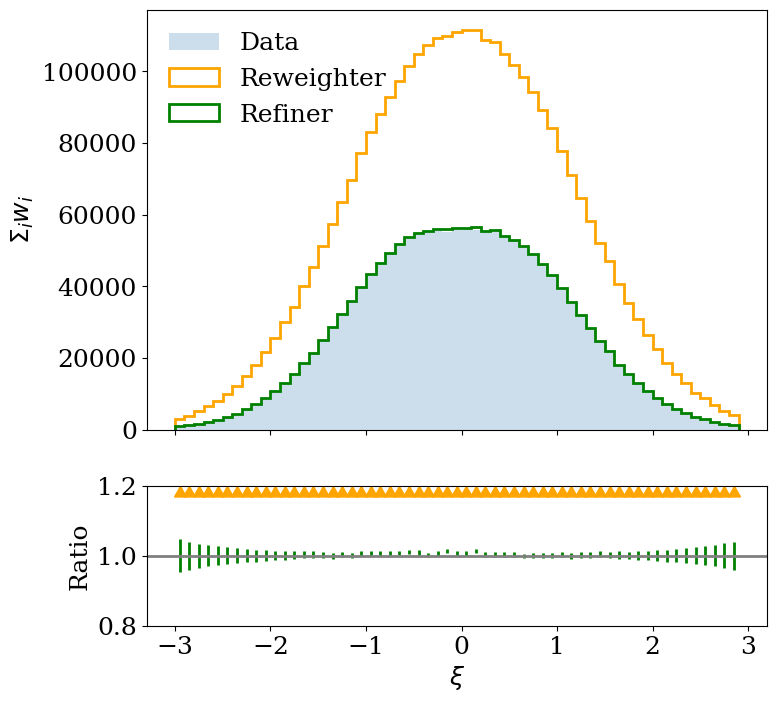

In [6]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, path=output_dir + "counts.pdf")

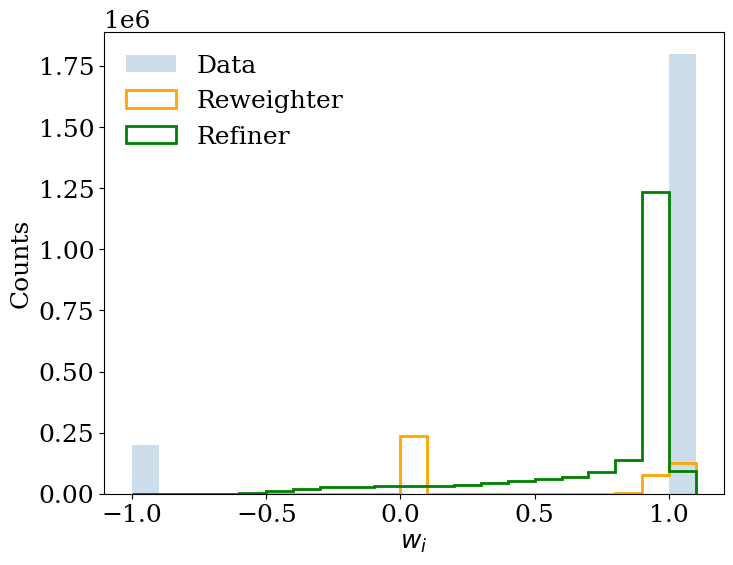

In [7]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(-1, 1.2, 0.1), path=output_dir + "weights.pdf")

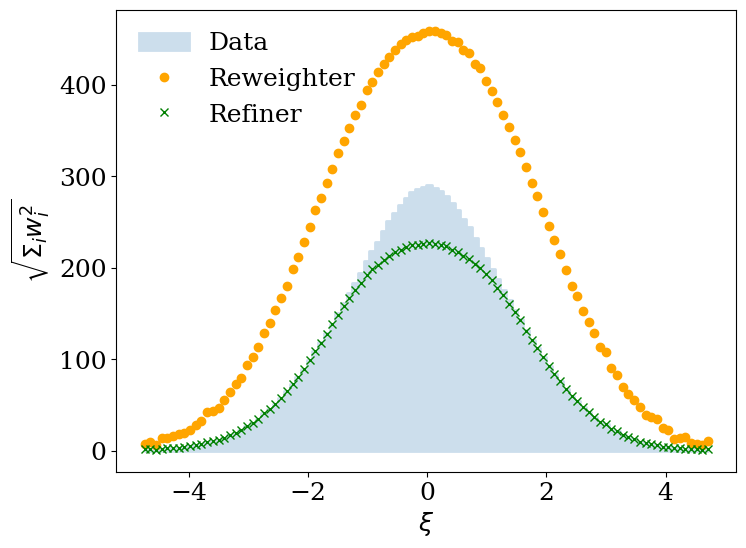

In [8]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins, path=output_dir + "variances.pdf")

In [9]:
data_reweighter_resampled = resample(*data_reweighter)
data_refiner_resampled = resample(*data_refiner)
len(data_reweighter_resampled[0]), len(data_refiner_resampled[0])

(1755008, 1522079)

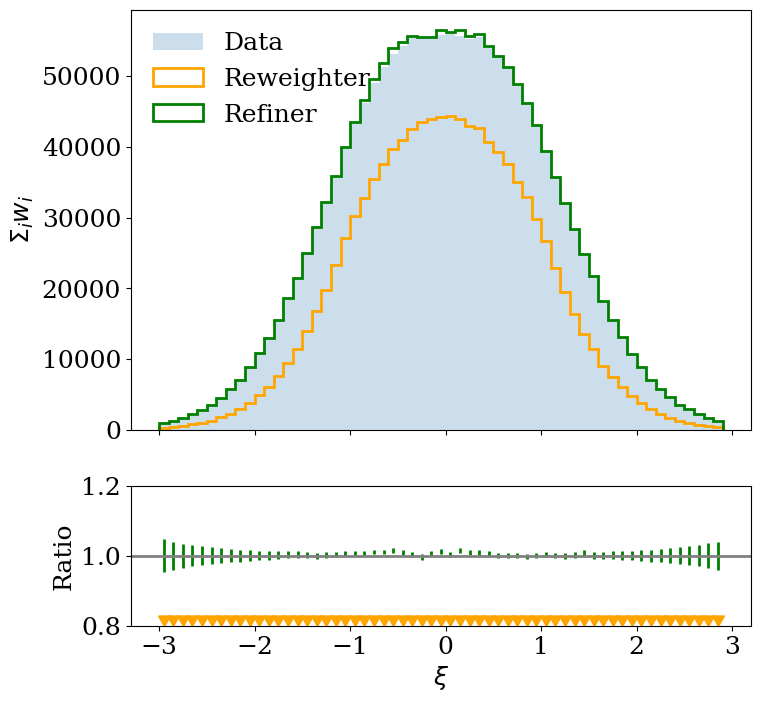

In [10]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins, path=output_dir + "counts_resampled.pdf")

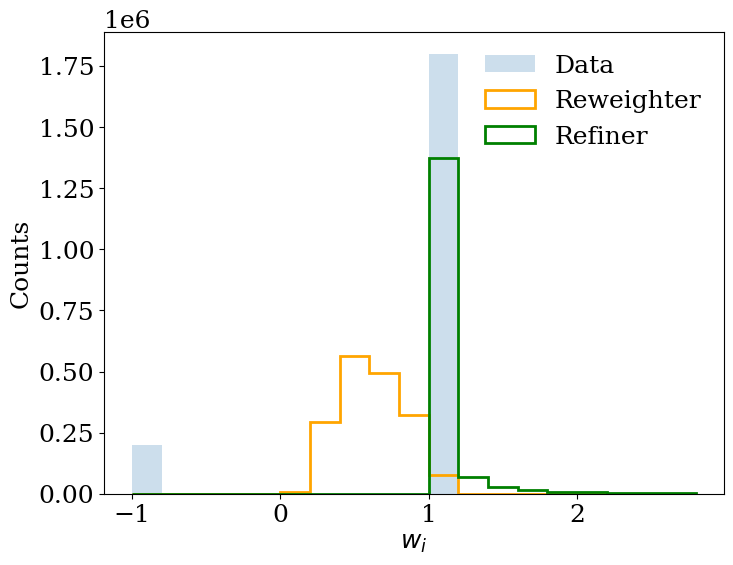

In [11]:
plot_w(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=np.arange(-1, 3.0, 0.2), path=output_dir + "weights_resampled.pdf")

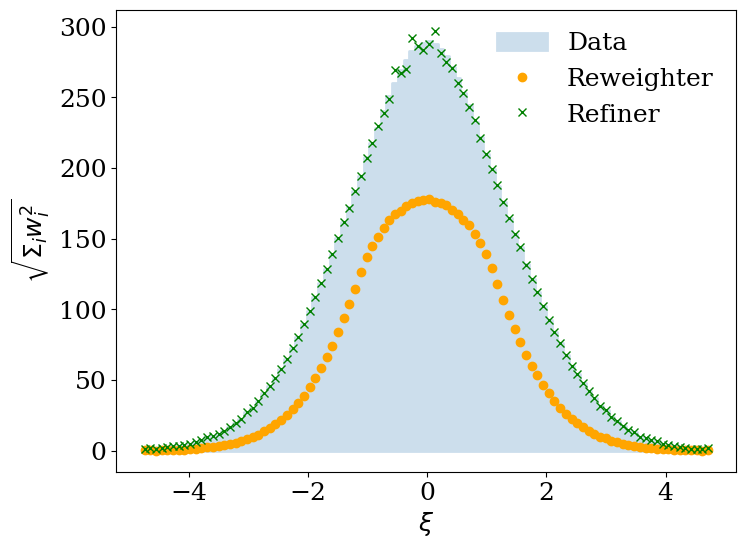

In [12]:
plot_w2(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins, path=output_dir + "variances_resampled.pdf")